C:\Users\CKZ\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (4,8,9,12,15,21,22,24,26,31,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


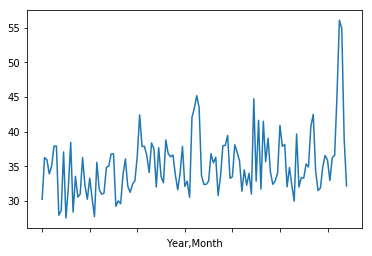

In [55]:
import pandas as pd

wind_speed = pd.read_csv("2281305.csv")
ave_speed = wind_speed.loc[:,('DATE','WND')]
ave_speed[['DA','DQC','TC','SR','SQC']] = wind_speed['WND'].str.split(',',expand = True)

ave_speed = ave_speed[ave_speed['DA'].astype('int') != 999]
ave_speed['DATE'] = pd.to_datetime(ave_speed['DATE'])
ave_speed['Year'] = ave_speed['DATE'].dt.year
ave_speed['Month'] = ave_speed['DATE'].dt.month
ave_speed['SR'] = ave_speed['SR'].astype('int')
ave_speed.groupby([ave_speed['Year'],ave_speed['Month']])['SR'].mean().plot()